# Apache Airflow

El Software de Apache Airflow requiere de un entorno de Python 3, empezando con Airflow 2.7.0 soportado por Python 3.8,3.9,3.10 y 3.11.
Unicamente la instalación *pip* es soportada.

# 1.- Ejecutar Airflow en sistema.

Siempre es bueno mantener toda tu información ordenada, por lo que te suguerimos instalar Airflow en una carpeta especifica que conozcas. Tambien es importante instalarlo en un entorno virtual. 

Airflow requiere un directorio local, y utiliza -/airfloww por default. Este paso de configuracion de la variable de entorno debe relizarse antes de instalar Airflow para que el proceso de instalación sepa donde almacenar los archivos necesarios.

Para windows:
- set AIRFLOW_HOME = ruta/donde/estara/airflow 


# 2.- Instalar Airflow utilizando tres archivos de configuración.

- AIRFLOW_VERSION=2.6.3
- PYTHON_VERSION="$(python --version | cut -d " " -f 2 | cut -d "." -f 1-2)"
- CONSTRAINT_URL="https://raw.githubusercontent.com/apache/airflow/constraints-\$\{AIRFLOW\_VERSION\}/constraints-\$\{PYTHON_VERSION\}.txt"

A partir de estas variables ejecutamos el siguiente comando:

**pip install "apache-airflow==\$\{AIRFLOW_VERSION\}" --constraint "\$\{CONSTRAINT_URL\}"**

cada linea de código se ejecuta en el bash o en la terminal de comandos, dependiendo del sistema operativo son los comandos necesarios.
El proceso tarda unos cuantos minutos.

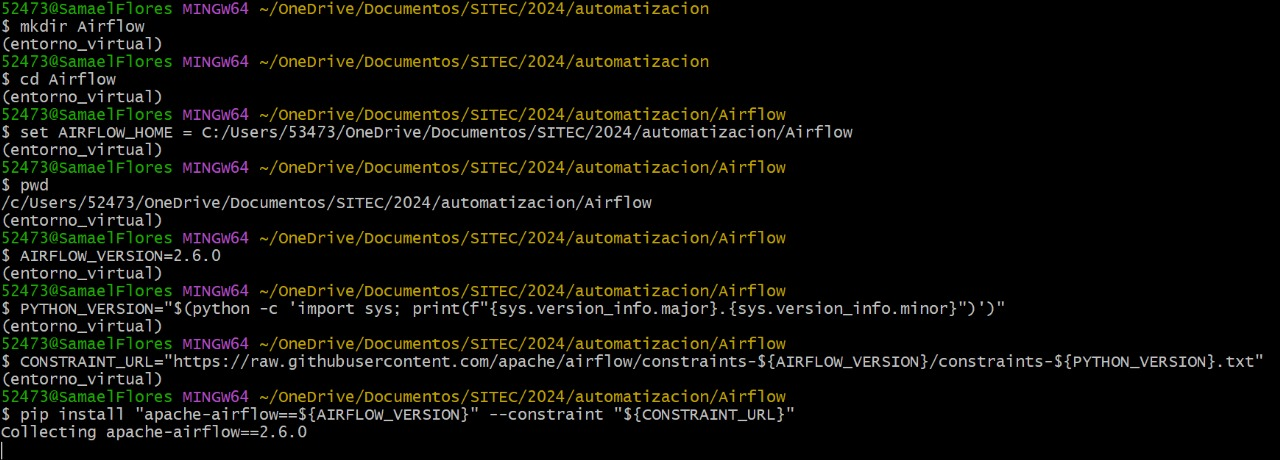




# 3.- Correr Airflow en modo Standalone.

El modo *Standalone* es util para ambientes de desarrollo y ejecuciones de procesos de prueba o para iniciados en la herramienta, ya que no se preocupas de configuraciones adicionales como bases de datos enternas, servicios de colas de mensajes o multiples nodos de ejecución.
Tambien todos los componentes básicos de Airflow (Scheduler, Web Server, y Metadata Database) se ejecutan en un solo proceso.
Existen otros tipos de modalidades como son: *Celery Executor*. *Kubernetes Executor* , *Local Executor*y *Sequential Executor* entre otros mas.

El comando de Airflow Standalone inicializará la base de datos, crera un usuario y activará todos los componentes.

- **airflow standalone**

# Advertencia

Debido a que Apache Airflow esta diseñado principalmente para entornos Unix/Linux **generará error en este paso**.
Existen varias opciones para resolver el problema, uno de ellos es utilizar WSL (Windows Subsystem for Linux).
POR LO QUE EN ESTE PUNTO ES IMPORTANTE DETERMINAR SI ES MAS EFECTIVO DADO LAS CONDICIONES ESPECIFICAS DE TU CASO Y USO SI UTILIZAR WSL (Maquina Ubuntu) o configurarlo directamente en un contenedor de Docker.


# 3.- Accesar al UI de Airflow

Visita el **localhost:8080** en tu navegador e inicia sesión con la *cuenta de administrador* mostradas en la terminal. 

Luego de correr estos comandos, *Airflow* creará el folder $AIRFLOW_HOME y ceara el archivo airflow.cfg con configuraciones predeterminadas.

Requerimos de instalar las librerias de apache Airflow;

- **pip install apache-airflow**


Luego de instalarse exitosamente la libreria, tenemos que inicializar la base de datos de Airflow y arrancar el servidor web; en el servidor web se manejará un interfaz de usuario donde podemos visualizar y administrar las tareas y procesos dentro de Airflow.

bash;

    - airflow db init
    - airflow webserver --port 8080
    - airflow scheduler


# DAG

Un DAG (Directed Acyclic Graph) o por su nombre en español; Grafo aciclico no dirigido, es una estructura de administración de tareas o acciones, en la cual se almacenan los procesos/tareas que se requieren de realizar y en que orden deberian de ejecutarse.

El DAG se centra especialmente en la ejecución de las tareas sin hacer incapie necesariamente en las tareas en si. La forma de declarar un DAG sigue la siguiente sintáxis;


In [ ]:
#Importamos las librerias necesarias para trabajar con los DAGS
from airflow import DAG
from airflow.operators.empty import EmptyOperator

#Importamos lobrerias de tiempo para determinar los tiempos en los que se ejecutarán las tareas
import datetime


# Operadores

Un operador es un tipo de plantilla para una *tarea predeterminada* (clase en python). Contiene el proceso lógico de ejecución de las tareas, cada tarea dentro de un dag es definido mediante la instanciación de un operador. este operador se puede definir dentro del DAG o ya sea una fracción de código independiente.
*Apache Airflow* ya tiene un conjunto basto de operadores (plantillas) definidos y disponibles.
Ejemplos;


- BashOperator : Ejecuta comandos de bash.
- PythonOperator : Manda llamar una función de python arbitraria.
- EmailOperator - Manda Emails

otros ejemplos de operadores;

- HttpOperator
- MySqlOperator
- OracleOperator
- JdbcOperator
- DockerOperator
- HiveOperator
-S3FileTransformOperator
- PrestoToMySqlOperator
- SlackAPIOperator

El orden de construcción generalmente es;

1- Definición del DAG.

2- Definición de los task o tareas.

3.- definir las relaciones entre tareas.


In [ ]:
#Definición del DAG

dag = DAG(
    dag_id = 'nombre_DAG',
    schedule = 'alarma_de_ejecución'
    catchup = False #Si el DAG deberia ejecutar las fechas pasadas que no se ejecutaron
    max_active runs = 1, #Limita el número de ejecuciones activas para un DAG
    
    #...
)

#Definición de Task
nombre_task1 = (
        task_id = 'nombre_tarea',
        operator_params = 'Variable_parametros_del_operador',
        dag = dag
        #...
)
nombre_task2 = (
        task_id = 'nombre_tarea',
        operator_params = 'Variable_parametros_del_operador',
        dag = dag
        #...
)
nombre_task3 = (
        task_id = 'nombre_tarea',
        operator_params = 'Variable_parametros_del_operador',
        dag = dag
        #...
)
#...

#Definir las relaciones entre las tareas.

nombre_task1 << nombre_task2 
nombre_task2 << nombre_task3
# Task1 -> Task2 -> Task3

Otros componentes:

1.- default_args : Los argumentos por default son configuraciones generales o valores predeterminados para las tareas dentro de un DAG. Evitan la repeticón de configuraciones comunes en cada tarea individual.
Sus configuraciones más comunes son:
- 'owner' : El propietario del DAG
- retries : Numero de veces que se reintentará una tarea fallida.
- 'depends_on_past : Indica si las tareas requieren de la finalización exitosa de una tarea anterior o previa.
- email : lista de correos electrónicos que recibirán notificaciones.
- email_on_failure: Sí se renvian correos electrónicos cuando la tarea es reintentada.
- retry_delay : Tiempo que se debe de esperar antes de reintentar la tarea
- start_date : Fecha de inicio del DAG.
- end_date : Fecha de finalización del DAG.
- execution_timeout : Tiempo máximo permitido para que se eejcute una tarea antes de marcarse como fállida.
- retry_exponential_backoff : Hábilita la espera exponencial entre reintentos.

2.- configuraciones especificas del operador;
A partir del tipo de operador (BashOperator,PythonOperator, etc..) existiran configuraciones extras.

3.- Sensores;
Los sensores son tareas que esperan una condición especifica antes de continuar con el flujo de trabajo. Un ejemplo es *FileSensor*, espera a que aparezca un archivo en una ubicación especifica.

4.-     Hooks y Conexiones:

    - Hooks: Se utilizan para contectarse a servicios externos como base de datos, APIs, etc.
    - Conexiones: Se confugran en la UI de Airflow y se refieren en los DAGs para interactuar con otros servicios externos.

7.- Variables y XComs:

    - Variables: Configuraciones globales que se pueden cambiar sin modificar el código del DAG.
    - XComs : Son las salidas que tienen las tareas. Esto permiten el intercambio de datos entre tareas e tiempo de ejecución.

Ejemplos:

In [ ]:
#librerias de tiempo
from datetime import datetime,timedelta


#Caracteristicas del proceso.

from airflow import DAG
from airflow.operators.python_operator import PythonOperator
from datetime import timedelta, days_ago


#Caracateristicas del dag
default_args = {
    'owner': 'airflow',
    'depends_on_past': False,
    'email_on_failure': False,
    'email_on_retry': False,
    'retries': 1,
    'retry_delay': timedelta(minutes=5),
    'start_date': days_ago(1),
}

#Configuraciones del DAG
dag = DAG(
    'my_etl_dag',
    default_args=default_args,
    description='A simple ETL DAG',
    schedule_interval=timedelta(days=1),
)


#Funciones de python que definirán las acciones de las tareas
def extract(**kwargs):
    # Lógica de extracción
    pass

def transform(**kwargs):
    # Lógica de transformación
    pass

def load(**kwargs):
    # Lógica de carga
    pass

#Definición de las tareas.

extract_task = PythonOperator(
    task_id='extract',
    python_callable=extract,
    dag=dag,
)

transform_task = PythonOperator(
    task_id='transform',
    python_callable=transform,
    dag=dag,
)

load_task = PythonOperator(
    task_id='load',
    python_callable=load,
    dag=dag,
)

#Definición del orden de tareas.
extract_task >> transform_task >> load_task


Es necesario tener la variable de entorno AIRFLOW HOME para automatizar el proceso desde otro entorno que no sea necesariamente el servidor en web. Puede ser a partir del bash, en algun dashboard u otro componente de trabajo.

Apache Airflow tambien maneja una API

Bibliografias:

- https://airflow.apache.org/docs/apache-airflow/stable/core-concepts/dags.html
- https://airflow.apache.org/docs/apache-airflow/stable/core-concepts/operators.html
- https://airflow.apache.org/docs/apache-airflow/1.10.10/tutorial.html
- https://www.astronomer.io/docs/learn/dags
- https://docs.aws.amazon.com/es_es/mwaa/latest/userguide/configuring-dag-folder.html
